In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [22]:
penguins = sns.load_dataset('penguins')
data = penguins.dropna()

In [23]:
print(len(data))
print(len(penguins))

333
344


In [24]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [25]:
data['species'] = data['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
#data['sex']=data['sex'].map({'Male':0,'Female':1})

C:\Users\USER\AppData\Local\Temp\ipykernel_2020\1116229410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = data['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})


In [26]:
targets = np.asarray(data['species'])
marker_style = ['o','s','^']
target_names = ['Adelie', 'Chinstrap','Gentoo']

In [27]:
data.drop(['species','island'],axis=1,inplace=True)
data.drop('sex',inplace=True,axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_2020\4016072604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['species','island'],axis=1,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2020\4016072604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('sex',inplace=True,axis=1)


In [28]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
df = pd.DataFrame(normalized_data,columns= data.columns)
df.shape
# data = (data - data.mean(axis=0)) / data.std(axis=0)

(333, 4)

In [29]:
co_var = np.cov(df.T)

In [30]:
eigen_values, eigen_vectors = np.linalg.eig(co_var)
print(eigen_values)
print(eigen_vectors)

[2.75362487 0.7804609  0.36975289 0.10820954]
[[-0.45375317  0.6001949   0.64249509  0.14516955]
 [ 0.39904723  0.79616951 -0.42580043 -0.1599044 ]
 [-0.576825    0.00578817 -0.23609516 -0.78198369]
 [-0.54967471  0.07646366 -0.59173738  0.58468615]]


In [31]:
total_eigen_value = eigen_values.sum()
propotion_of_variance = (eigen_values/total_eigen_value)*100
propotion_of_variance

array([68.63389314, 19.45292928,  9.21606299,  2.69711459])

In [32]:
P = eigen_vectors.copy()
X = df.T
Y = np.matmul(P.T,X)
cov_y = np.cov(Y)
cov_y

array([[ 2.75362487e+00,  3.17665727e-16,  9.91557975e-16,
         5.00927753e-16],
       [ 3.17665727e-16,  7.80460898e-01,  6.01494742e-16,
        -6.70474757e-16],
       [ 9.91557975e-16,  6.01494742e-16,  3.69752889e-01,
         3.71599477e-16],
       [ 5.00927753e-16, -6.70474757e-16,  3.71599477e-16,
         1.08209537e-01]])

In [33]:
def PCA(principle_components):
  significant_eigen_vector = P.T[principle_components,:]
  print(f'Significant eigen vector is {significant_eigen_vector}')
  mat = np.matmul(significant_eigen_vector,X)
  cov_mat = np.cov(mat)
  print(f'covariance matrix is {cov_mat}')
  return mat

def MakePlot(dimension,mat,plot_labels):
  fig = plt.figure(figsize=(8,8))
  scatter_handles = []
  if(dimension == '3d'):
    ax = fig.add_subplot(111,projection=dimension)
    a=mat.T.iloc[:,0]
    b=mat.T.iloc[:,1]
    c=mat.T.iloc[:,2]
    for label in set(targets):
      mask = [t == label for t in targets]
      scatter = ax.scatter(a[mask], b[mask], c[mask], marker=marker_style[label], label=target_names[label])
      scatter_handles.append(scatter)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])
    ax.set_zlabel(plot_labels[2],rotation=90,labelpad=0)
  else:
    ax = fig.add_subplot(111)
    ax.set_xlabel(plot_labels[0])
    if(dimension =='2d'):
      a=mat.T.iloc[:,0]
      b=mat.T.iloc[:,1]
      ax.set_ylabel(plot_labels[1])
    elif(dimension =='1d'):
      a=mat.T.iloc[:,0]
      b=np.zeros_like(a)
    for label in set(targets):
      mask = [t == label for t in targets]
      scatter = ax.scatter(a[mask], b[mask], marker=marker_style[label], label=target_names[label])
      scatter_handles.append(scatter)
  plt.grid()
  plt.title('PCAScatterPlot')

  plt.legend(handles=scatter_handles, title='Targets')
  plt.show()
  return


Significant eigen vector is [[-0.45375317  0.39904723 -0.576825   -0.54967471]
 [ 0.6001949   0.79616951  0.00578817  0.07646366]
 [ 0.64249509 -0.42580043 -0.23609516 -0.59173738]]
covariance matrix is [[2.75362487e+00 3.17665727e-16 9.91557975e-16]
 [3.17665727e-16 7.80460898e-01 6.01494742e-16]
 [9.91557975e-16 6.01494742e-16 3.69752889e-01]]


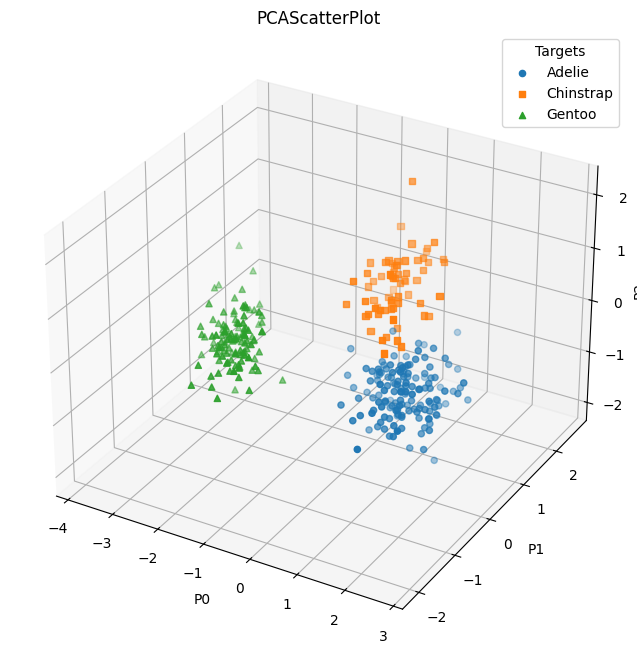

In [34]:
mat = PCA([0,1,2])
MakePlot('3d',mat,['P0','P1','P2'])

Significant eigen vector is [[-0.45375317  0.39904723 -0.576825   -0.54967471]
 [ 0.6001949   0.79616951  0.00578817  0.07646366]]
covariance matrix is [[2.75362487e+00 3.17665727e-16]
 [3.17665727e-16 7.80460898e-01]]


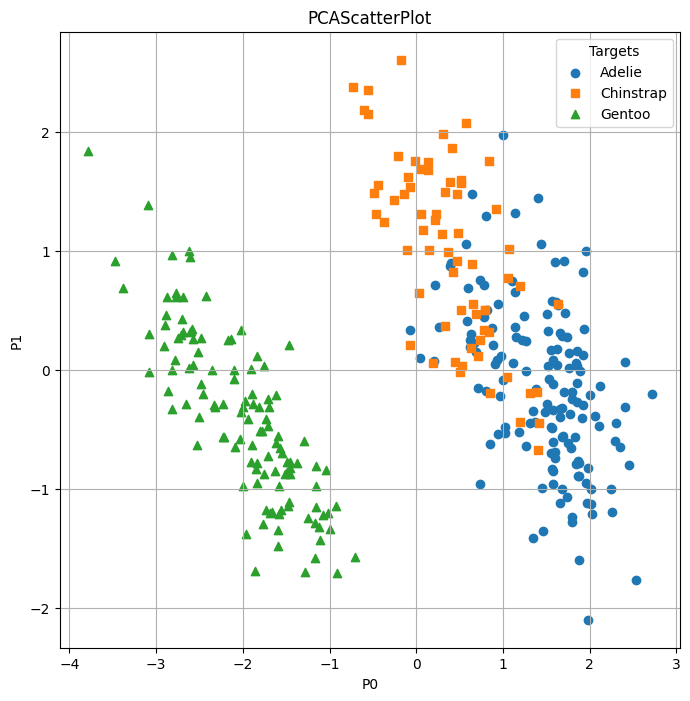

Significant eigen vector is [[-0.45375317  0.39904723 -0.576825   -0.54967471]
 [ 0.64249509 -0.42580043 -0.23609516 -0.59173738]]
covariance matrix is [[2.75362487e+00 9.91557975e-16]
 [9.91557975e-16 3.69752889e-01]]


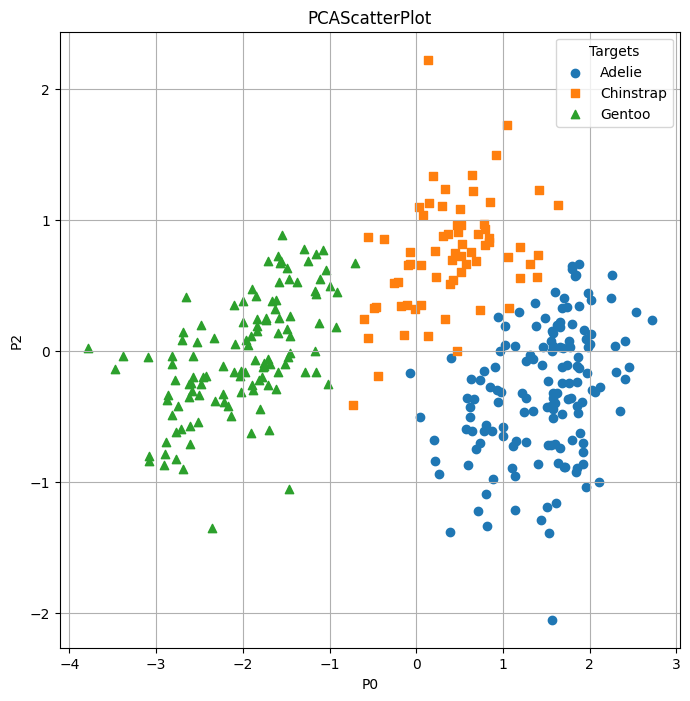

In [38]:
mat = PCA([0,1])
MakePlot('2d',mat,['P0','P1'])
mat = PCA([0,2])
MakePlot('2d',mat,['P0','P2'])

Significant eigen vector is [[-0.45375317  0.39904723 -0.576825   -0.54967471]]
covariance matrix is 2.753624869191287


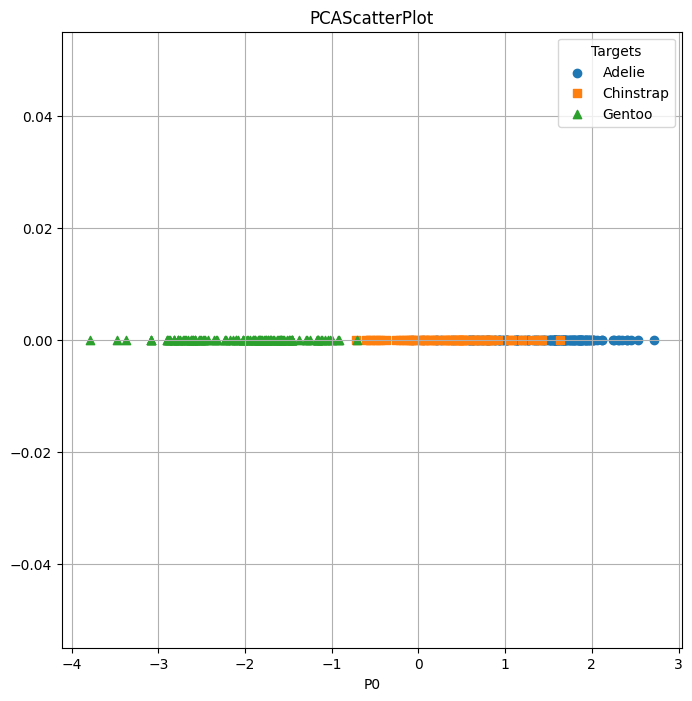

In [36]:
mat = PCA([0])
MakePlot('1d',mat,['P0'])